# Topic 1: Introduction to LangGraph

Welcome to your LangGraph journey! In this notebook, you'll learn the fundamentals of LangGraph and build your first graph.

## What is LangGraph?

LangGraph is a library for building stateful, multi-actor applications with LLMs. It's built on top of LangChain and adds the ability to create cyclical graphs, which are essential for agent-like behaviors.

### Key Concepts:

1. **Nodes**: Functions that do the work
2. **Edges**: Connections between nodes
3. **State**: Data that flows through the graph
4. **Graph**: The overall structure that orchestrates everything

## Setup

First, let's install the required packages and set up our environment.

In [ ]:
# Install required packages
!pip install langgraph langchain-anthropic langchain-core -q




[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
import getpass

# Set your Anthropic API key
if "ANTHROPIC_API_KEY" not in os.environ:
    os.environ["ANTHROPIC_API_KEY"] = getpass.getpass("Enter your Anthropic API key: ")

print("✓ API key set successfully!")

✓ API key set successfully!


## Core Concepts: State

In LangGraph, state is represented as a TypedDict. This defines what data flows through your graph.

In [3]:
from typing import TypedDict, Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

# Define our state
class State(TypedDict):
    messages: Annotated[list, add_messages]
    
print("State definition created!")
print("Our state has a 'messages' field that will accumulate messages.")

State definition created!
Our state has a 'messages' field that will accumulate messages.


## Core Concepts: Nodes

Nodes are functions that receive the current state and return updates to that state.

In [12]:
from langchain_anthropic import ChatAnthropic

# Initialize the Claude model
model = ChatAnthropic(model="claude-sonnet-4-20250514")

# Create a simple node that calls the LLM
def chatbot(state: State):
    """A node that calls Claude with the current messages."""
    response = model.invoke(state["messages"])
    return {"messages": [response]}

print("✓ Chatbot node created!")

✓ Chatbot node created!


## Building Your First Graph

Now let's combine everything to create a simple graph.

In [13]:
# Create a new graph
graph_builder = StateGraph(State)

# Add our chatbot node
graph_builder.add_node("chatbot", chatbot)

# Add edges
graph_builder.add_edge(START, "chatbot")  # Entry point
graph_builder.add_edge("chatbot", END)    # Exit point

# Compile the graph
graph = graph_builder.compile()

print("✓ Graph compiled successfully!")

✓ Graph compiled successfully!


## Visualizing the Graph

LangGraph can generate a visual representation of your graph:

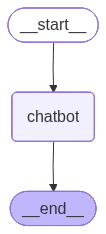

In [14]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    print("Graph visualization not available. Install graphviz to see the graph.")
    print("Graph structure: START -> chatbot -> END")

## Running the Graph

Let's test our graph with a simple message:

In [15]:
from langchain_core.messages import HumanMessage

# Run the graph with a message
result = graph.invoke({
    "messages": [HumanMessage(content="Hello! What is LangGraph?")]
})

# Print the response
print("\nClaude's response:")
print(result["messages"][-1].content)


Claude's response:
Hello! LangGraph is a framework for building stateful, multi-actor applications with Large Language Models (LLMs). Here are its key features:

## What it is:
- A Python library built on top of LangChain
- Designed for creating complex, multi-step AI workflows and agents
- Uses a graph-based approach to model application logic

## Key capabilities:
- **Stateful conversations**: Maintains context across multiple interactions
- **Multi-agent systems**: Coordinate multiple AI agents working together
- **Workflow orchestration**: Chain together different LLM calls and operations
- **Conditional logic**: Branch workflows based on results or conditions
- **Human-in-the-loop**: Integrate human feedback and approval steps
- **Persistence**: Save and restore conversation/workflow state

## Common use cases:
- Building sophisticated chatbots and virtual assistants
- Creating multi-step research or analysis workflows
- Developing AI agents that can plan and execute complex task

## Streaming Responses

LangGraph supports streaming, which is great for real-time applications:

In [18]:
# Stream the graph execution
print("\nStreaming response:")
for event in graph.stream({
    "messages": [HumanMessage(content="Explain what makes LangGraph useful in 2 sentences.")]
}):
    for value in event.values():
        print(value["messages"][-1].content)
        print(" ")


Streaming response:
LangGraph is useful because it enables developers to build complex, stateful AI workflows where language models can engage in multi-step reasoning, maintain conversation history, and make dynamic decisions based on previous outputs. Its graph-based architecture allows for sophisticated control flow patterns like loops, conditionals, and parallel execution, making it ideal for creating robust AI agents that can handle complex tasks requiring multiple interactions and decision points.
 


## Exercise: Build Your Own Graph

Now it's your turn! Create a graph that:
1. Takes a user message
2. Calls Claude
3. Returns the response

Try asking it to help you plan a simple application.

In [19]:
# Your code here!
# Hint: You can reuse the code above and modify the message

your_message = "Help me plan a simple todo list application"

# TODO: Run the graph with your message


## Key Takeaways

In this notebook, you learned:

1. ✅ What LangGraph is and its core concepts (nodes, edges, state)
2. ✅ How to define state using TypedDict
3. ✅ How to create nodes that process state
4. ✅ How to build and compile a graph
5. ✅ How to run graphs and stream responses

## Next Steps

In the next notebook, you'll learn how to:
- Create more complex graphs with multiple nodes
- Manage state across multiple steps
- Build linear workflows

Continue to **Topic 2: Basic Graphs** when you're ready!